## Engineering Task Knowledge Graph

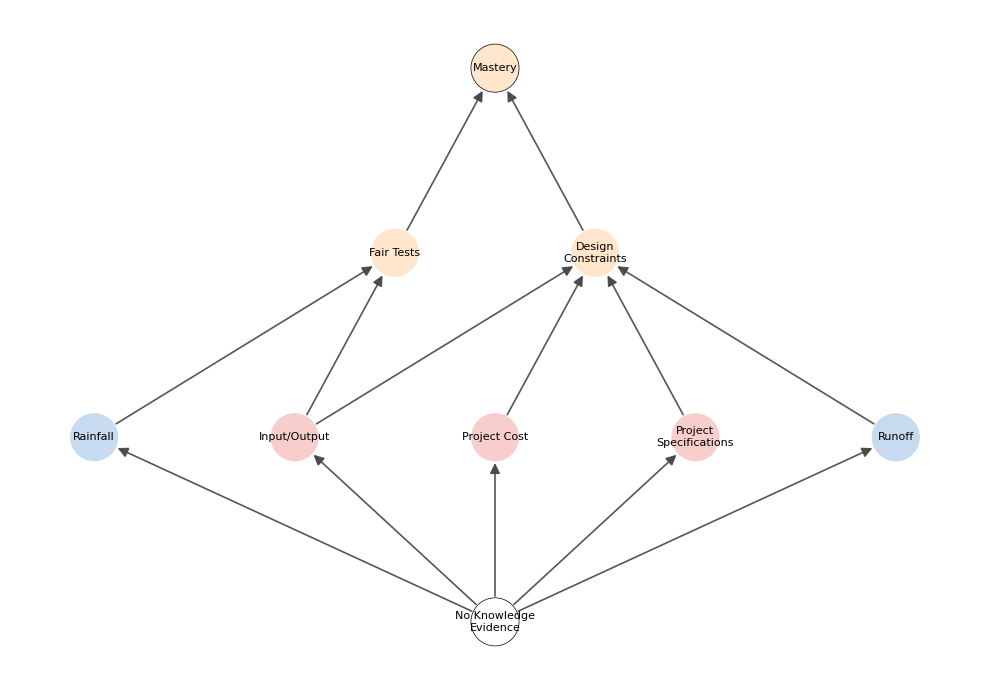

In [1]:
import math
import networkx as nx
import matplotlib.pyplot as plt

mastery_node = "Mastery"
null_node    = "No Knowledge\nEvidence"

mid_nodes = ["Fair Tests", "Design\nConstraints"]

concept_nodes = [
    "Rainfall",
    "Input/Output",
    "Project Cost",
    "Project\nSpecifications",
    "Runoff"
]

edges = [(null_node, n) for n in concept_nodes]

edges += [
    ("Rainfall", "Fair Tests"),
    ("Input/Output", "Fair Tests"),
    ("Input/Output", "Design\nConstraints"),
    ("Project Cost", "Design\nConstraints"),
    ("Project\nSpecifications", "Design\nConstraints"),
    ("Runoff", "Design\nConstraints"),
]

edges += [(n, mastery_node) for n in mid_nodes]

G = nx.DiGraph()
G.add_nodes_from([mastery_node, null_node] + mid_nodes + concept_nodes)
G.add_edges_from(edges)

pos = {mastery_node: (0, 3), null_node: (0, 0)}

pos["Fair Tests"] = (-1, 2)
pos["Design\nConstraints"] = (1, 2)

for i, n in enumerate(concept_nodes):
    pos[n] = (-4 + 2 * i, 1)

fill_colors = []
for n in G.nodes():
    if n == mastery_node:
        fill_colors.append("#FFE6CC")
    elif n == null_node:
        fill_colors.append("#FFFFFF")
    elif n in mid_nodes:
        fill_colors.append("#FFE6CC")
    elif n in ["Input/Output", "Project Cost", "Project\nSpecifications"]:
        fill_colors.append("#F8CECC")
    else:
        fill_colors.append("#C6DBEF")

border_colors = ["black" if n in {mastery_node, null_node} else "#00000000"
                 for n in G.nodes()]

node_size = 1200
radius_pt = math.sqrt(node_size / math.pi)
margin_pt = radius_pt - 1

plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(G, pos, node_size=node_size,
                       node_color=fill_colors,
                       edgecolors=border_colors,
                       linewidths=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos,
                       arrows=True,
                       arrowsize=15,
                       edge_color="#444444",
                       alpha=0.9,
                       width=1.2,
                       min_source_margin=margin_pt,
                       min_target_margin=margin_pt)
plt.axis("off")
plt.tight_layout()
plt.show()